## CNN 

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D
from keras import regularizers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import pickle
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import Functions as func
import GetPickles
import var
import Viz

Using plaidml.keras.backend backend.


In [2]:
### best is model weights 2

In [3]:
def get_conv_model_normal(dim):
    
    inp_shape = dim
    act = 'relu'
    drop = .5 
    kernal_reg = regularizers.l1(.001)
    dil_rate = 2
    
    
    model = Sequential() 
    
    model.add(Conv2D(64, kernel_size=(3,3),activation=act, input_shape = inp_shape, 
                     kernel_regularizer = kernal_reg,
                     kernel_initializer = 'he_uniform',  padding = 'same', name = 'Input_Layer'))
    model.add(Dense(64, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),  strides = (2,2)))
    
    
    model.add(Conv2D(64, (3, 3), activation=act, kernel_regularizer = kernal_reg, 
                     kernel_initializer = 'he_uniform',padding = 'same'))
    model.add(Dense(64, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
    

    
    model.add(Conv2D(128, (3, 3), activation=act, kernel_regularizer = kernal_reg, 
                     kernel_initializer = 'he_uniform',padding = 'same'))
    model.add(Conv2D(128, (3, 3), activation=act, kernel_regularizer = kernal_reg, 
                     kernel_initializer = 'he_uniform',padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

    
    model.add(Flatten())

    
#     model.add(Dense(128, activation='relu'))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(32, activation='relu'))


    model.add(Dropout(drop))

    model.add(Dense(3, activation='softmax', name = 'Output_Layer'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model 


In [4]:
x_train, x_test, y_train, y_test = GetPickles.get_samples('normal', edge = True)


In [5]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(6512, 96, 96, 1) (724, 96, 96, 1)
(6512, 3) (724, 3)


In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator


augment = False 
early_stopping = EarlyStopping(monitor='val_loss', verbose = 1, patience=14)
model_checkpoint = ModelCheckpoint('../models/Edge-CNN-ModelCheckpointWeights.h5', verbose = 1, save_best_only=True,
                                  monitor = 'val_loss')
lr_plat = ReduceLROnPlateau(patience = 3, mode = 'min')
epochs = 100
batch_size = 32

    
normal_model = get_conv_model_normal(dim =(96,96,1))

if augment: 
    augmentation =ImageDataGenerator(rotation_range = 20, width_shift_range = .2, height_shift_range = .2, 
                                                           horizontal_flip = True, shear_range = .15, 
                                     fill_mode = 'nearest', zoom_range = .15)
    augmentation.fit(x_train)
    normal_history = normal_model.fit_generator(augmentation.flow(x_train, y_train, batch_size = batch_size),
                epochs = epochs, 
         callbacks = [early_stopping, model_checkpoint, lr_plat], validation_data = (x_test, y_test), verbose= 1)
else: 
    
    normal_history = normal_model.fit(x_train, y_train, batch_size = batch_size,
                epochs = epochs, 
         callbacks = [early_stopping, model_checkpoint, lr_plat], validation_data = (x_test, y_test), verbose= 1)


INFO:plaidml:Opening device "opencl_amd_ellesmere.0"


Train on 6512 samples, validate on 724 samples
Epoch 1/100
6512/6512 [==============================] - 48s 7ms/step - loss: 21.3361 - acc: 0.3790 - val_loss: 11.3884 - val_acc: 0.4047

Epoch 00001: val_loss improved from inf to 11.38844, saving model to ../models/Edge-CNN-ModelCheckpointWeights.h5
Epoch 2/100
6512/6512 [==============================] - 22s 3ms/step - loss: 11.0231 - acc: 0.3943 - val_loss: 10.6382 - val_acc: 0.4061

Epoch 00002: val_loss improved from 11.38844 to 10.63817, saving model to ../models/Edge-CNN-ModelCheckpointWeights.h5
Epoch 3/100
6512/6512 [==============================] - 22s 3ms/step - loss: 10.2834 - acc: 0.4010 - val_loss: 9.9208 - val_acc: 0.4061

Epoch 00003: val_loss improved from 10.63817 to 9.92077, saving model to ../models/Edge-CNN-ModelCheckpointWeights.h5
Epoch 4/100
6512/6512 [==============================] - 22s 3ms/step - loss: 9.5850 - acc: 0.4134 - val_loss: 9.2423 - val_acc: 0.4061

Epoch 00004: val_loss improved from 9.92077 to 9.

6512/6512 [==============================] - 22s 3ms/step - loss: 1.2984 - acc: 0.4085 - val_loss: 1.2967 - val_acc: 0.4061

Epoch 00033: val_loss did not improve from 1.28471
Epoch 34/100
6512/6512 [==============================] - 22s 3ms/step - loss: 1.2492 - acc: 0.4000 - val_loss: 1.2203 - val_acc: 0.4061

Epoch 00034: val_loss improved from 1.28471 to 1.22035, saving model to ../models/Edge-CNN-ModelCheckpointWeights.h5
Epoch 35/100
6512/6512 [==============================] - 22s 3ms/step - loss: 1.2064 - acc: 0.3996 - val_loss: 1.1933 - val_acc: 0.4047

Epoch 00035: val_loss improved from 1.22035 to 1.19328, saving model to ../models/Edge-CNN-ModelCheckpointWeights.h5
Epoch 36/100
6512/6512 [==============================] - 22s 3ms/step - loss: 1.1833 - acc: 0.3951 - val_loss: 1.1732 - val_acc: 0.4061

Epoch 00036: val_loss improved from 1.19328 to 1.17318, saving model to ../models/Edge-CNN-ModelCheckpointWeights.h5
Epoch 37/100
6512/6512 [==============================] - 2


Epoch 00066: val_loss improved from 1.05070 to 1.04802, saving model to ../models/Edge-CNN-ModelCheckpointWeights.h5
Epoch 67/100
6512/6512 [==============================] - 23s 3ms/step - loss: 1.0481 - acc: 0.4053 - val_loss: 1.0480 - val_acc: 0.4061

Epoch 00067: val_loss improved from 1.04802 to 1.04801, saving model to ../models/Edge-CNN-ModelCheckpointWeights.h5
Epoch 68/100
6512/6512 [==============================] - 22s 3ms/step - loss: 1.0481 - acc: 0.4053 - val_loss: 1.0480 - val_acc: 0.4061

Epoch 00068: val_loss did not improve from 1.04801
Epoch 69/100
6512/6512 [==============================] - 23s 3ms/step - loss: 1.0481 - acc: 0.4053 - val_loss: 1.0480 - val_acc: 0.4061

Epoch 00069: val_loss improved from 1.04801 to 1.04800, saving model to ../models/Edge-CNN-ModelCheckpointWeights.h5
Epoch 70/100
6512/6512 [==============================] - 22s 3ms/step - loss: 1.0478 - acc: 0.4053 - val_loss: 1.0477 - val_acc: 0.4061

Epoch 00070: val_loss improved from 1.04800 t

In [ ]:
print(normal_model.summary())

### Loss & Accuracy

In [ ]:
Viz.plot_loss_accuracy(normal_history)

### AUC and ROC Curves

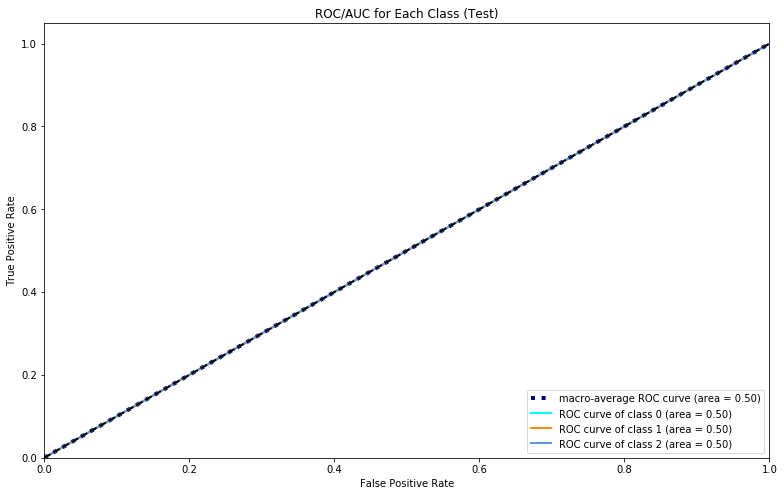

F1 Scores Test
~~~~~~~~~~~~~~~~~~~~~~
No Weapon: 0.5776031434184676
HandGun: 0.0
Rifle: 0.0


In [7]:
dim = (96,96,1)
    
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/Edge-CNN-ModelCheckpointWeights.h5') #load the best weights before overfitting
 


    
Viz.plot_roc_auc(normal_model, x_test, y_test)

### Confusion Matrix

In [ ]:
if var.img_type == 'grey': 
    dim = (var.norm_dimension[0], var.norm_dimension[1], 1)
else: 
    dim = (var.norm_dimension[0], var.norm_dimension[1], 3)
        
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/Edge-CNN-ModelCheckpointWeights.h5') #load the best weights before overfitting





y_test_prob = [np.argmax(i) for i in normal_model.predict(x_test)]
y_test_labels = [np.argmax(
    i) for i in y_test]
test_cnf = confusion_matrix(y_test_labels, y_test_prob)

y_train_prob = [np.argmax(i) for i in normal_model.predict(x_train)]
y_train_labels = [np.argmax(i) for i in y_train]
train_cnf = confusion_matrix(y_train_labels, y_train_prob)

Viz.plot_model_cm(test_cnf, train_cnf, classes = ['No Weapon', 'Handgun', 'Rifle'])


In [ ]:
assert False

#### Test on Google Data


In [ ]:
import cv2
from lime import lime_image
from skimage.segmentation import mark_boundaries



In [ ]:
base_path = '../TestImages'
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/Edge-CNN-ModelCheckpointWeights.h5')

for file in os.listdir(base_path): 
    if file == '.ipynb_checkpoints':
        continue
    full_path = f'{base_path}/{file}'
    img = func.get_image_value(full_path, var.norm_dimension, var.img_type)
    img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
    pred = normal_model.predict(img)[0]
    print(f'{file}\t\t{np.argmax(pred)}\t\t{pred.max()}\t\t{pred}')

In [ ]:
base_path = '../TestImages'

normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/CNN-ModelCheckpointWeights2.h5')
for file in os.listdir(base_path): 
    if file == '.ipynb_checkpoints':
        continue
    full_path = f'{base_path}/{file}'
    img = func.get_image_value(full_path, var.norm_dimension, var.img_type)
    img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
    pred = normal_model.predict(img)[0]
    print(f'{file}\t\t{np.argmax(pred)}\t\t{pred.max()}\t\t{pred}')

In [ ]:
base_path = '../TestImages'
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/CNN-ModelCheckpointWeights3.h5')

for file in os.listdir(base_path): 
    if file == '.ipynb_checkpoints':
        continue
    full_path = f'{base_path}/{file}'
    img = func.get_image_value(full_path, var.norm_dimension, var.img_type)
    img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
    pred = normal_model.predict(img)[0]
    print(f'{file}\t\t{np.argmax(pred)}\t\t{pred.max()}\t\t{pred}')

In [ ]:
#model 3
if var.img_type == 'grey': 
    dim = (var.norm_dimension[0], var.norm_dimension[1], 1)
else: 
    dim = (var.norm_dimension[0], var.norm_dimension[1], 3)
        

img = func.get_image_value('../TestImages/AR.jpg', var.norm_dimension, var.img_type)

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(img, normal_model.predict, top_labels = 5, hide_color = 0, 
                                         num_samples = 1000)

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = False,
                                           num_features = 10, hide_rest = False)
plt.imshow(mark_boundaries(temp/2 + .5, mask))

In [ ]:
assert False

In [ ]:
if var.img_type == 'grey': 
    dim = (var.norm_dimension[0], var.norm_dimension[1], 1)
else: 
    dim = (var.norm_dimension[0], var.norm_dimension[1], 3)
        
normal_model = get_conv_model_normal(dim)
normal_model.load_weights('../models/CNN-ModelCheckpointWeights2.h5')

img = cv2.imread('../TestImages/AR.jpg')
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
rects = ss.process() 

windows = []
locations = []
for x, y, w,h in rects: 
    startx = x 
    starty = y 
    endx = x+w 
    endy = y+h 
    roi = img[starty:endy, startx:endx]
    roi = cv2.resize(roi, dsize =var.norm_dimension, interpolation = cv2.INTER_CUBIC)
    windows.append(roi)
    locations.append((startx, starty, endx, endy))
    


In [ ]:
windows = np.array(windows[:2000])

predictions = normal_model.predict(windows)

In [ ]:
# for i in predictions:
#     print(i)

In [ ]:
clone = img.copy()
new_loc = [] 
new_prob = [] 
no_gun = predictions[:, 0].sum()
handgun = predictions[:,1].sum()
rifle = predictions[:,2].sum()
sum_array = np.array([no_gun, handgun, rifle])
index_unit = np.argmax(sum_array)
cat_types = ['No Gun', 'Handgun', 'Rifle']
print(index_unit)
print(no_gun, handgun, rifle)
new_locations = []
for idx, i in enumerate(predictions):
    category = i[index_unit]
    if category > .5:
        startx, starty, endx, endy = locations[idx]
        new_locations.append([startx, starty, endx, endy])
        new_loc.append(locations[idx])
        new_prob.append(category)

new_locations = np.array(new_locations)

startx = int(new_locations[:,0].mean())
starty =int( new_locations[:,1].mean())
endx = int(new_locations[:,2].mean())
endy = int(new_locations[:,3].mean())


# startx = int(np.median (new_locations[:,0]))
# starty =int( np.median (new_locations[:,1]))
# endx = int(np.median (new_locations[:,2]))
# endy = int(np.median(new_locations[:,3]))

prob_avg = np.array(new_prob).mean()


cv2.rectangle(clone, (startx, starty), (endx, endy),  (0,255,0),2)

text = f'{cat_types[index_unit]}: {int(prob_avg*100)}'
cv2.putText(clone, text, (startx, starty), cv2.FONT_HERSHEY_SIMPLEX, .45, (0,255,0),2)
   
    
cv2.imshow('test', clone)
cv2.waitKey(0)

In [ ]:
assert False

In [ ]:
clone = img.copy()
  
startx, starty, endx, endy = new_loc[boxid]
cv2.rectangle(clone, (startx, starty), (endx, endy),  (0,255,0),2)
text = f'Weapon: {i*100}'
cv2.putText(clone, text, (startx, y), cv2.FONT_HERSHEY_SIMPLEX, .45, (0,255,0),2)
cv2.imshow('test', clone)
cv2.waitKey(0)

In [ ]:
clone = img.copy()
roi = clone[starty:endy, startx:endx]
roi = cv2.resize(roi, dsize =var.dimension, interpolation = cv2.INTER_CUBIC)
# cv2.imshow('test', roi)
# cv2.waitKey(0)
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(roi, normal_model.predict, top_labels = 5, hide_color = 0, 
                                         num_samples = 1000)


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = False,
                                           num_features = 10, hide_rest = False)
plt.imshow(mark_boundaries(temp/2 + .5, mask))